<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/Random_Sample_Imputer(Handling_Missing_Data)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **For Numerical**

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/train (1).csv',usecols=['Age','Fare','Survived'])

In [ ]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [ ]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.isnull().sum()

,0
Age,140
Fare,0


In [ ]:
x_train['Age_imputed']=x_train['Age']
x_test['Age_imputed']=x_test['Age']
x_train.tail()

,Age,Fare,Age_imputed
106,21.0,7.6500,21.0
270,NaN,31.0000,NaN
860,41.0,14.1083,41.0
435,14.0,120.0000,14.0
102,21.0,77.2875,21.0


In [ ]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age_imputed'].dropna().sample(x_train['Age_imputed'].isnull().sum()).values
x_test['Age_imputed'][x_test['Age_imputed'].isnull()]=x_test['Age_imputed'].dropna().sample(x_test['Age_imputed'].isnull().sum()).values

<ipython-input-26-113a7249b544>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  x_train['Age_imputed'][x_train['Age_imputed'].isnull()]=x_train['Age_imputed'].dropna().sample(x_train['Age_imputed'].isnull().sum()).values
<ipython-input-26-1

<ipython-input-33-23207c21fef8>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age_imputed'],kde=True,label='Age_imputed',hist=False)
<ipython-input-33-23207c21fef8>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],kde=True,label='Age',hist=False)


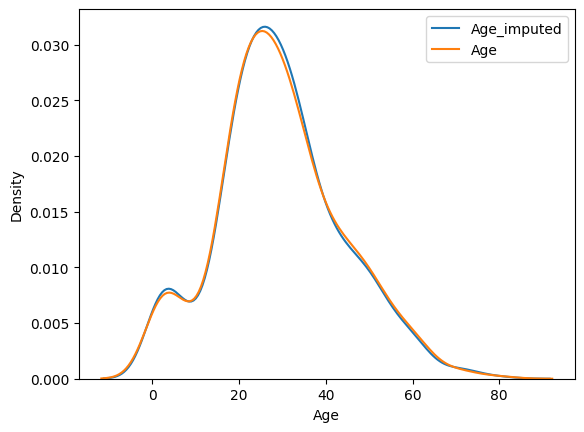

In [ ]:
sns.distplot(x_train['Age_imputed'],kde=True,label='Age_imputed',hist=False)
sns.distplot(x_train['Age'],kde=True,label='Age',hist=False)
plt.legend()
plt.show()

In [ ]:
print('Original variable variance: ', x_train['Age'].var())
print('Variance after random imputation: ', x_train['Age_imputed'].var())

Original variable variance:  210.2517072477438
Variance after random imputation:  207.55177648113906


In [ ]:
x_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,57.792250
Age,71.580633,210.251707,210.251707
Age_imputed,57.792250,210.251707,207.551776


<Axes: >

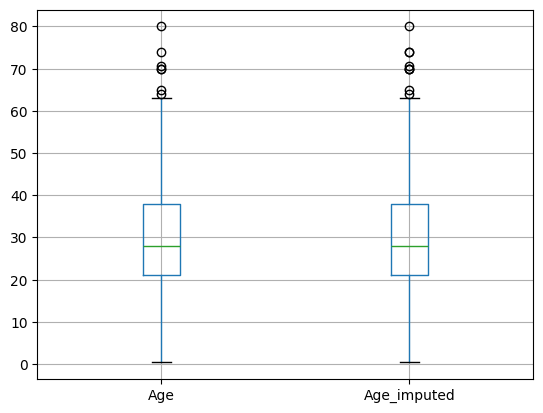

In [ ]:
x_train[['Age', 'Age_imputed']].boxplot()

In [ ]:
#it gives same random no for same input , here it observes the Fare  and  provide the random no which it provide before to the same Fare input
observation = x_train.sample(1)
fare_value = observation['Fare'].iloc[0]  # .iloc[0] gets the value from the first (and only) row
sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

<ipython-input-40-fc9c2073a59f>:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  sampled_value = x_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))


# **For Categorical**

In [ ]:
df=pd.read_csv('/content/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [ ]:
df.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [ ]:
x=df
y=df['SalePrice']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
x_train

,FireplaceQu,GarageQual,SalePrice
254,NaN,TA,145000
1066,TA,TA,178000
638,NaN,NaN,85000
799,TA,TA,175000
380,Gd,TA,127000
...,...,...,...
1095,Gd,TA,176432
1130,TA,TA,135000
1294,NaN,TA,115000
860,Gd,TA,189950


In [ ]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']

x_train['FireplaceQu_imputed']=x_train['FireplaceQu']
x_test['FireplaceQu_imputed']=x_test['FireplaceQu']

In [ ]:
x_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
254,NaN,TA,145000,TA,NaN
1066,TA,TA,178000,TA,TA
638,NaN,NaN,85000,NaN,NaN
799,TA,TA,175000,TA,TA
380,Gd,TA,127000,TA,Gd
...,...,...,...,...,...
1095,Gd,TA,176432,TA,Gd
1130,TA,TA,135000,TA,TA
1294,NaN,TA,115000,TA,NaN
860,Gd,TA,189950,TA,Gd


In [ ]:
x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual_imputed'].dropna().sample(x_train['GarageQual_imputed'].isnull().sum()).values
x_test['GarageQual_imputed'][x_test['GarageQual_imputed'].isnull()]=x_test['GarageQual_imputed'].dropna().sample(x_test['GarageQual_imputed'].isnull().sum()).values

x_train['FireplaceQu_imputed'][x_train['FireplaceQu_imputed'].isnull()]=x_train['FireplaceQu_imputed'].dropna().sample(x_train['FireplaceQu_imputed'].isnull().sum()).values
x_test['FireplaceQu_imputed'][x_test['FireplaceQu_imputed'].isnull()]=x_test['FireplaceQu_imputed'].dropna().sample(x_test['FireplaceQu_imputed'].isnull().sum()).values

<ipython-input-62-3941bc6c4f0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['GarageQual_imputed'][x_train['GarageQual_imputed'].isnull()]=x_train['GarageQual_imputed'].dropna().sample(x_train['GarageQual_imputed'].isnull().sum()).values
<ipython-input-62-3941bc6c4f0f>:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.lo

In [ ]:
x_train.isnull().sum()

,0
FireplaceQu,547
GarageQual,64
SalePrice,0
GarageQual_imputed,0
FireplaceQu_imputed,0


In [ ]:
temp = pd.concat(
        [
            x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
            x_train['GarageQual_imputed'].value_counts() / len(x_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp


,original,imputed
TA,0.951087,0.949486
Fa,0.032609,0.034247
Gd,0.011775,0.011986
Ex,0.002717,0.002568
Po,0.001812,0.001712


In [ ]:
temp = pd.concat(
        [
            x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
            x_train['FireplaceQu_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.491143,0.395890
TA,0.405797,0.323288
Fa,0.043478,0.035616
Ex,0.033816,0.026027
Po,0.025765,0.019178


<ipython-input-79-1e4cfa3fd7f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-79-1e4cfa3fd7f6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] =

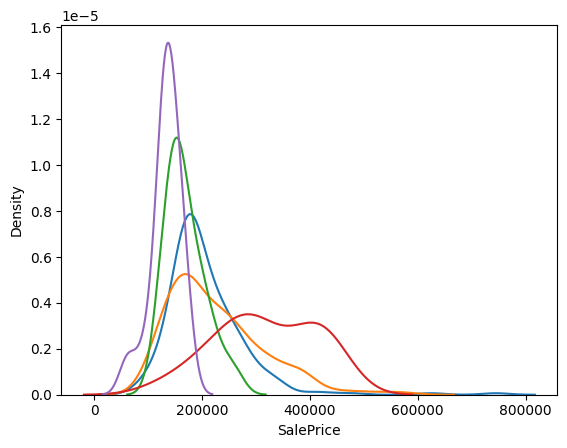

In [ ]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<ipython-input-76-b530087ce9d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
<ipython-input-76-b530087ce9d7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['Firepla

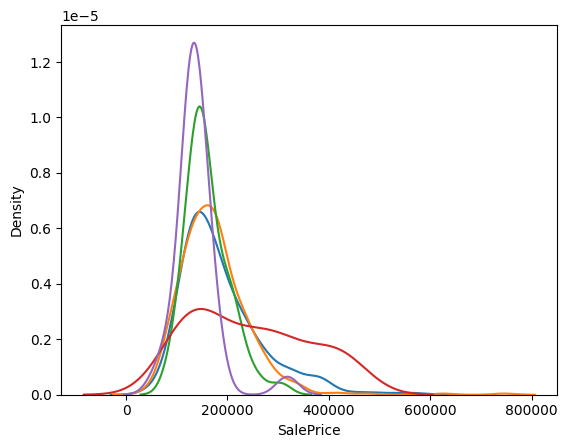

In [ ]:
for category in x_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

<ipython-input-86-fc4d761fa38f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['GarageQual_imputed']== category]['SalePrice'],hist=False,label=category)
<ipython-input-86-fc4d761fa38f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['GarageQua

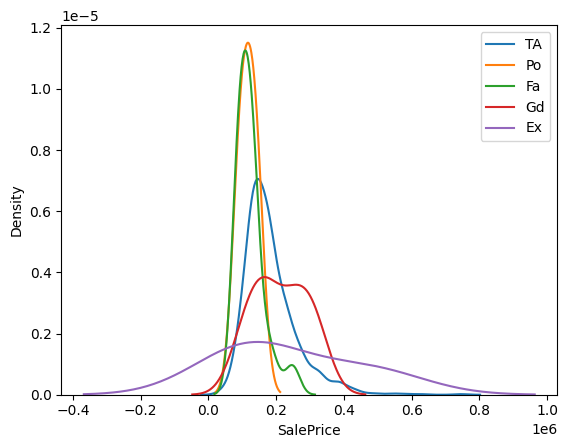

In [ ]:
for category in x_train['GarageQual_imputed'].dropna().unique():
  sns.distplot(x_train[x_train['GarageQual_imputed']== category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()

<ipython-input-87-04482f10e5d6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['GarageQual']== category]['SalePrice'],hist=False,label=category)
<ipython-input-87-04482f10e5d6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['GarageQual']== ca

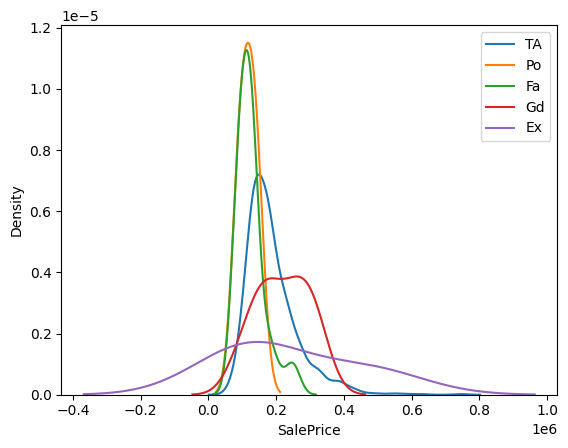

In [ ]:
for category in x_train['GarageQual'].dropna().unique():
  sns.distplot(x_train[x_train['GarageQual']== category]['SalePrice'],hist=False,label=category)
plt.legend()
plt.show()